In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import time library
import time
from datetime import datetime

# Import the API key and set the URL
from config import weather_api_key
# Starting URL for Weather Map API Call.
# Add the units=Imperial to set temperature to Farenheit
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

# Results are zipped
# The zip object packs each pair of lats and lngs having the same index in their 
# respective array into a tuple. If there are 1,500 latitudes and longitudes, 
# there will be 1,500 tuples of paired latitudes and longitudes, where each 
# latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Add the latitudes and longitudes to a list
# You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() furnction to display the latitude and longitude combination for coordinate in coordinates
# create a list for the cities
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("_______________________________")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes
    #Pause for 60 seconds to all use of the free version of the API (only allows 50 calls per minute)
    if (i % 50) == 0 and (i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Rn an API request for the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country":city_country,
                          "Date": city_date})
    #If an error occurs, skip the city.
    except:
        print("city not found. Skipping...")
        # Generally, it isn't good coding practice to add 
        # the pass statement to the except block. Ideally, we want to handle or catch each error 
        # as it happens and do something specific (e.g., add another try block or print out the error).
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
_______________________________
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | elko
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | taolanaro
city not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | orkney
Processing Record 9 of Set 1 | comodoro rivadavia
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | barentsburg
city not found. Skipping...
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | gazojak
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | north bend
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | aripuana
Processin

In [7]:
# Convert the list/array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
new_column_order=["City", "Country","Date","Lat","Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Constitucion,CL,2022-01-31 22:12:37,-35.3333,-72.4167,66.42,59,0,13.69
1,Elko,US,2022-01-31 22:12:38,41.0002,-115.5012,42.82,52,8,12.66
2,Esperance,AU,2022-01-31 22:12:38,-33.8667,121.9000,61.05,61,88,15.57
3,Ushuaia,AR,2022-01-31 22:12:38,-54.8000,-68.3000,42.46,81,75,34.52
4,Rikitea,PF,2022-01-31 22:12:39,-23.1203,-134.9692,77.59,65,81,4.18
5,Port Alfred,ZA,2022-01-31 22:12:39,-33.5906,26.8910,75.33,95,100,6.29
6,Orkney,ZA,2022-01-31 22:12:39,-26.9802,26.6727,66.16,76,100,2.15
7,Comodoro Rivadavia,AR,2022-01-31 22:12:40,-45.8667,-67.5000,76.86,22,38,28.77
8,Mataura,NZ,2022-01-31 22:12:40,-46.1927,168.8643,72.48,61,54,1.63
9,Cidreira,BR,2022-01-31 22:12:41,-30.1811,-50.2056,75.45,79,35,8.48


In [9]:
# Create the Output file (CSV
output_data_file = "weather_data/cities"

#Export the City_Data into a CSV
# The last line in the code block will export the DataFrame to a CSV file, 
# with the index label (or column A) header as "City_ID." If we ever need 
# to export the CSV file to a DataFrame, that header will be present in the DataFrame.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

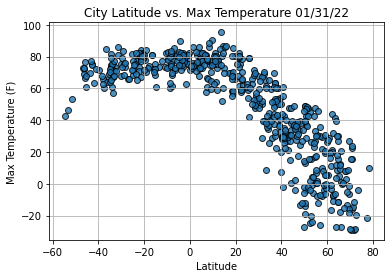

In [14]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

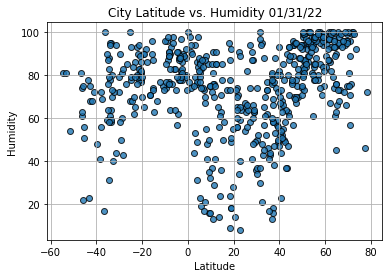

In [15]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

#Show Plot
plt.show()

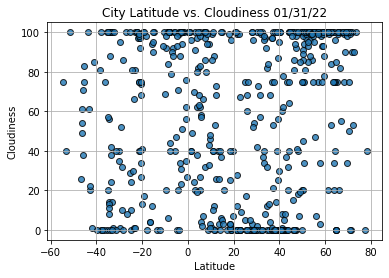

In [19]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

#Show Plot
plt.show()

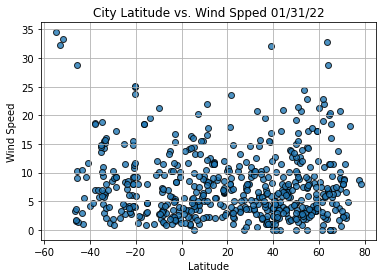

In [20]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Spped " + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

#Show Plot
plt.show()